In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.shape

(5572, 5)

# Steps for the machine learning project 
### :Data Cleaning
### :EDA 
### :Text Preprocessing
### :Model Building 
### :Evaluation 
### :Improvment
### :website
### :Deploy

# 1 Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
## drop last 3 cols 
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
5554,ham,Well keep in mind I've only got enough gas for...
2969,ham,U should make a fb list
454,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
5461,ham,Ok i thk i got it. Then u wan me 2 come now or...
3487,ham,Still i have not checked it da. . .


In [7]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace=True)

In [8]:
df.sample(5)

,Target,Text
4830,ham,Po de :-):):-):-):-). No need job aha.
3596,spam,Congratulations YOU'VE Won. You're a Winner in...
3804,ham,Dude while were makin those weirdy brownies my...
2131,ham,S...from the training manual it show there is ...
3060,ham,What u talking bout early morning? It's almost...


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])


In [10]:
## missing value
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA


In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.value_counts()


Target  Text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [16]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [17]:
plt.style.use('seaborn-v0_8')

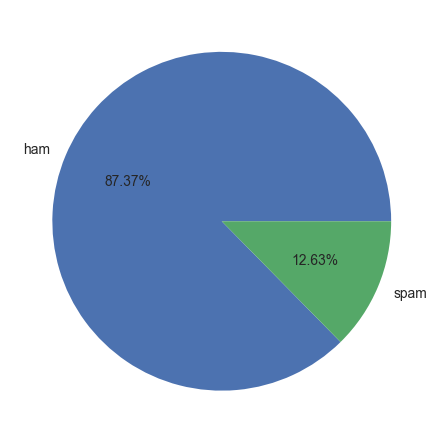

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%' )
plt.show()

In [19]:
## data is imbalanaced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['Text'].apply(len)

In [21]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
#num_of_words

df['num_word'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
#num_of_sentence
df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df[['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham message
df[df['Target'] == 0][['num_characters','num_word','num_sentence']].describe()


,num_characters,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#spam message
df[df['Target'] == 1][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

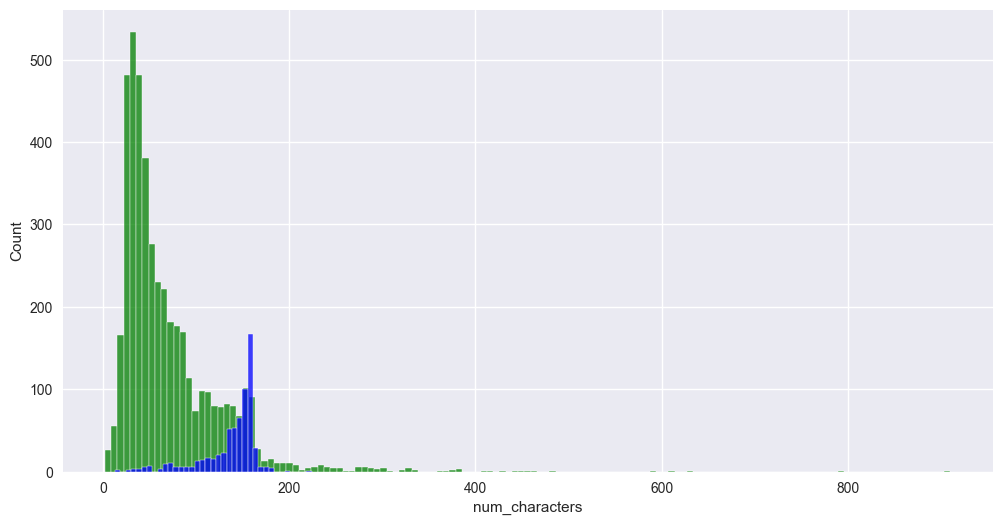

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['Target'] == 1]['num_characters'],color='blue')

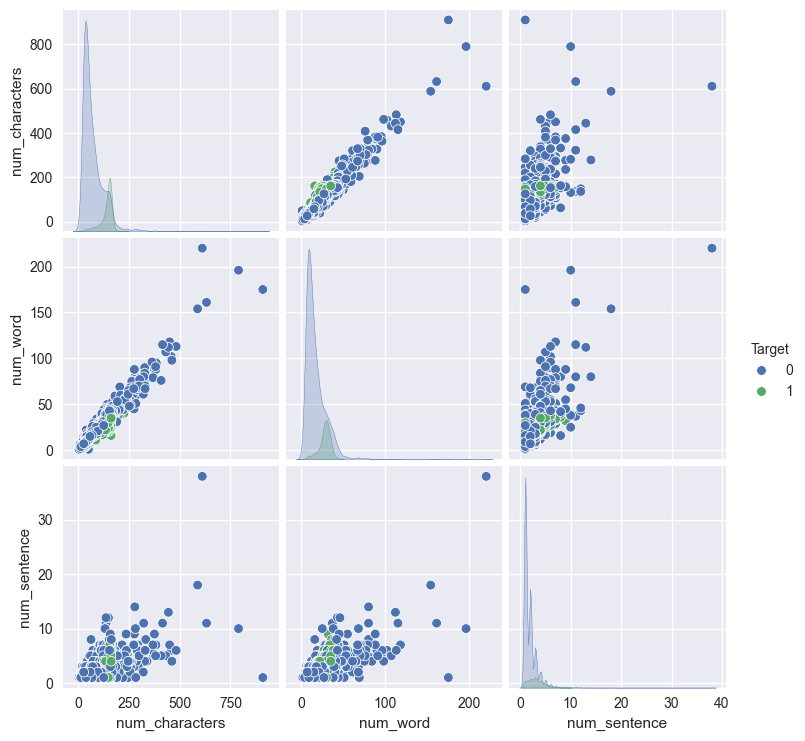

In [29]:
sns.pairplot(df,hue='Target')

<Axes: >

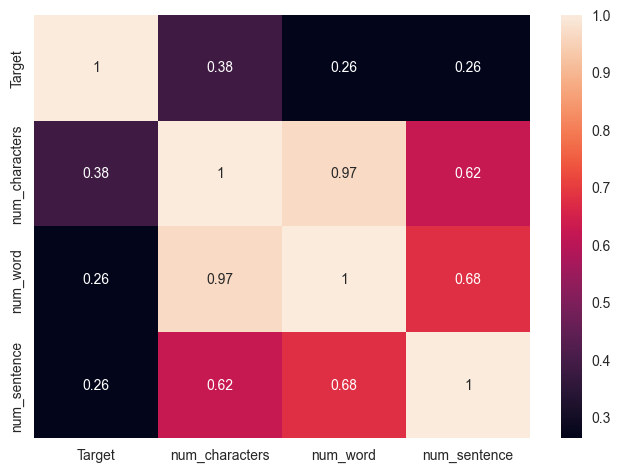

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


*is se samj main aaya hai ki jo ye data hai na usme hum num_character ka use krege model create krne main or kisi ka nhi doing to correlation with the data*



In [31]:
df.corr(numeric_only= True)

,Target,num_characters,num_word,num_sentence
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_word,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


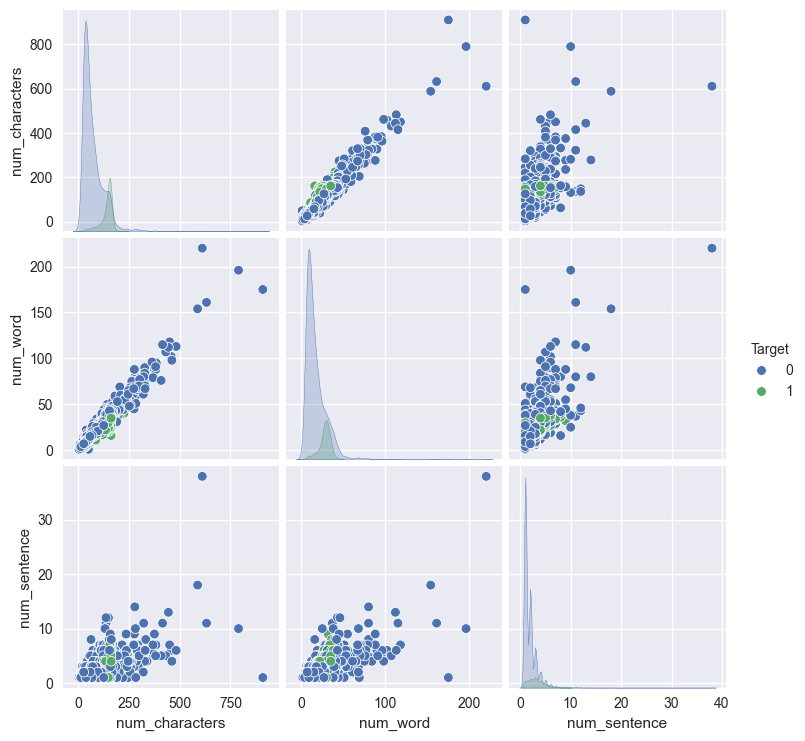

In [32]:

sns.pairplot(df,hue='Target')

# 3. Data Preprocessing
####  Lower Case 
####   Tokenization
####   Removing special characters
####   Removing stop words and punctuation
####   stemming -- matlb same words ko ek karna 


In [33]:
from nltk.corpus import stopwords
stopwords.words('english')
import string 
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [34]:
import nltk


In [35]:
nltk.download('punkt')
nltk.download('punkt_tab')   # (sometimes needed in new NLTK versions)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [37]:
# stamming ke liye humko nltk ki jarurat padati hia or main usme 
# usme nltk.stem.porter se krte hia fir uska main object bana lete hai 

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df.head()

,Target,Text,num_characters,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [43]:
df['Transform_Text'] = df['Text'].apply(transform_text)

In [44]:
df.head()

,Target,Text,num_characters,num_word,num_sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud 


wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


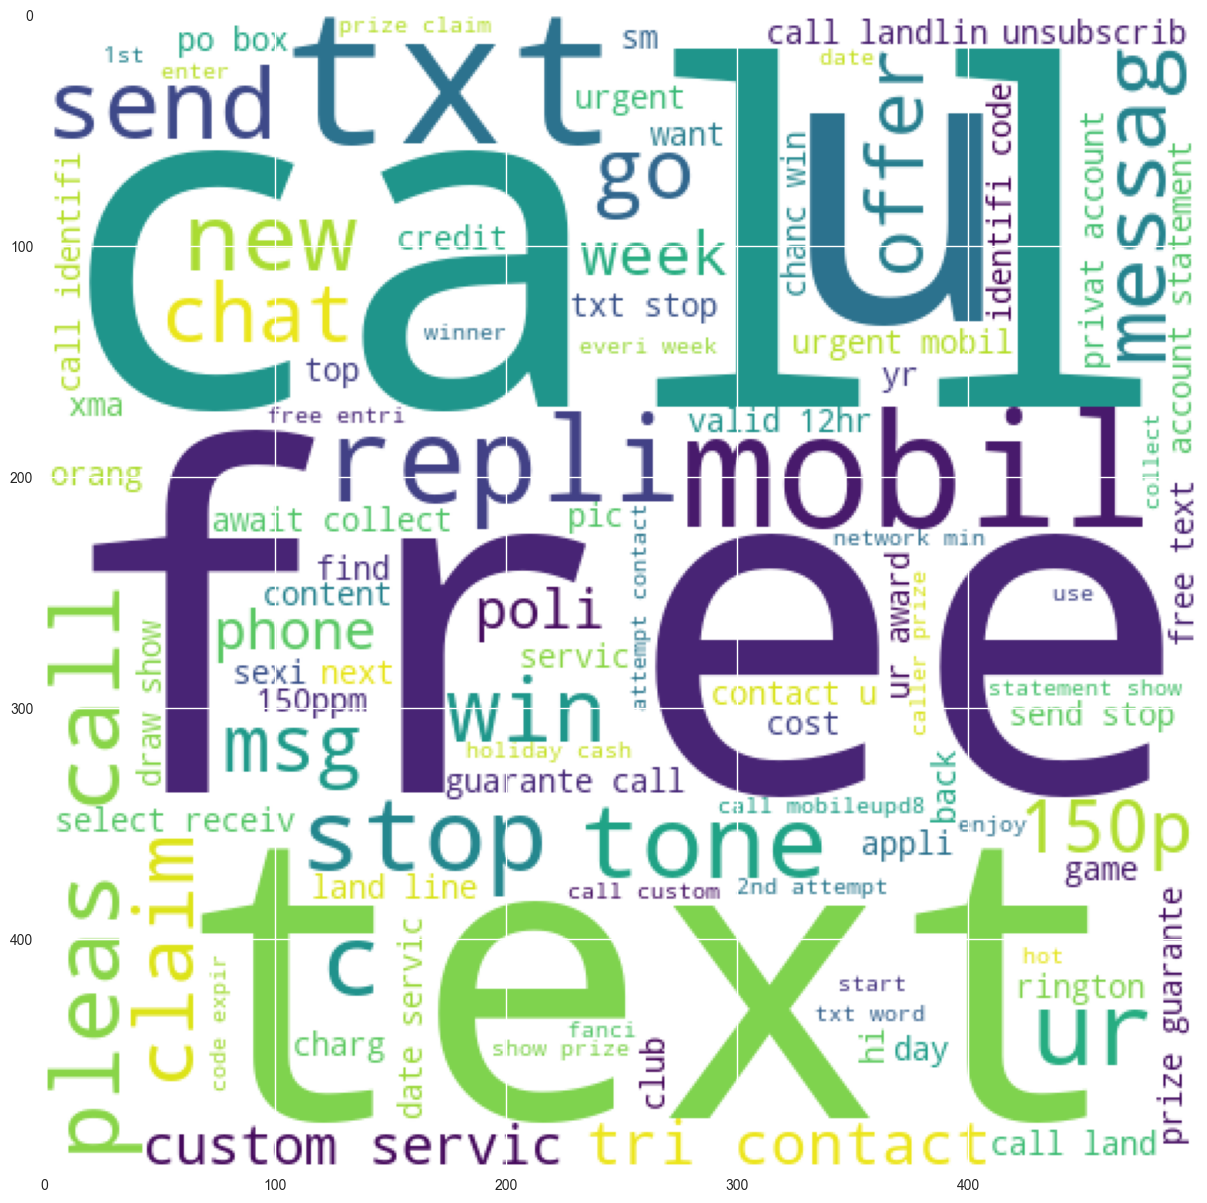

In [46]:
import matplotlib.pyplot as plt
spam_wc = wc.generate(df[df['Target']==1]['Transform_Text'].str.cat(sep=' '))
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

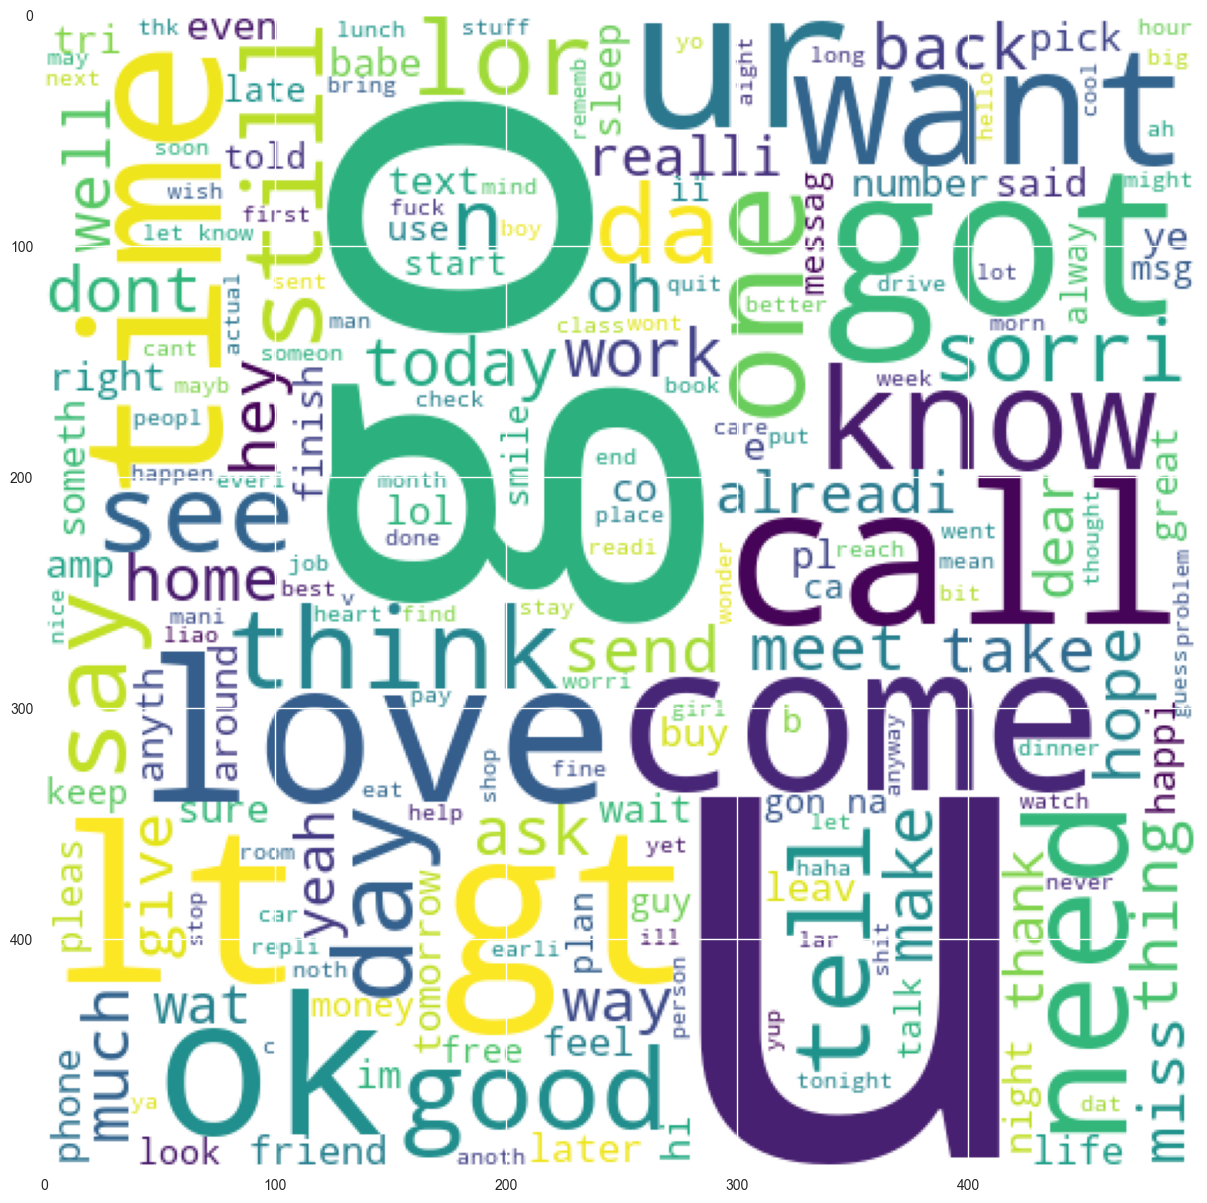

In [47]:
hum_wc = wc.generate(df[df['Target']==0]['Transform_Text'].str.cat(sep=' '))
plt.figure(figsize=(15,15))
plt.imshow(hum_wc)

In [48]:
df.head()

,Target,Text,num_characters,num_word,num_sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
ham_corpus = []

for msg in df[df['Target'] == 0]['Transform_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [50]:
len(spam_corpus)

NameError: name 'spam_corpus' is not defined

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dff = pd.DataFrame(Counter(spam_corpus).most_common(30))

# create colourful palette
palette = sns.color_palette("husl", len(dff))




plt.figure(figsize=(12,5))
sns.barplot(x=dff[0], y=dff[1], palette=palette)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
df.head()

# 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidr = TfidfVectorizer(max_features = 3000)

In [ ]:
x = tfidr.fit_transform(df['Transform_Text']).toarray()

In [ ]:
# from sklearn.preprocessing import Min Maxscalar
#scaler = MinMaxScaler()
#x = Scaler.fit_transfrom(x)

In [ ]:
#appending the num_character col to x
#x = np.hstack((x,df['num_characters'].value.reshape(-1,1)))

In [ ]:
x.shape

In [ ]:
y = df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))      

In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# tfidf ---> MNB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

NameError: name 'clfs' is not defined